xmin = [ 2. -1.]
fmin = 1.1072500969488698e-24
improvements = 260


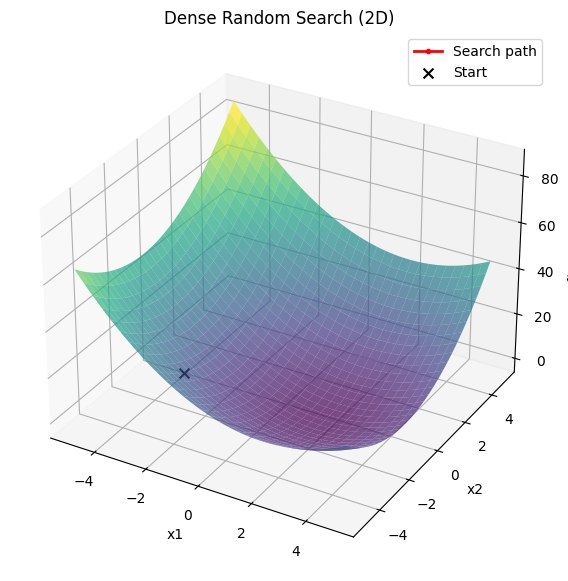

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def dense_random_search(f, a, b, M, seed=None):
    a, b = np.asarray(a, float), np.asarray(b, float)
    if seed is not None:
        np.random.seed(seed)

    x = a + np.random.rand(len(a)) * (b - a)
    best_x, best_f = x.copy(), f(x)
    hist = [best_x.copy()]
    k = 1

    while k <= M:
        alpha = np.random.rand(len(a))
        x = best_x + (b - a) * ((2 * alpha - 1) ** k) / k

        if np.all((x >= a) & (x <= b)):
            fx = f(x)
            if fx < best_f:
                best_x, best_f = x.copy(), fx
                hist.append(best_x.copy())
                k = 1
            else:
                k += 1
        else:
            k += 1

    return best_x, best_f, np.asarray(hist)

def f_test1(x):
    return (x[0] - 2) ** 2 + (x[1] + 1) ** 2

f = f_test1
a, b, M = [-5, -5], [5, 5], 100

xmin, fmin, history = dense_random_search(f, a, b, M)
print("xmin =", xmin)
print("fmin =", fmin)
print("improvements =", len(history))

x = np.linspace(a[0], b[0], 300)
y = np.linspace(a[1], b[1], 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[f([xi, yi]) for xi, yi in zip(rx, ry)] for rx, ry in zip(X, Y)], float)

xs, ys = history[:, 0], history[:, 1]
zs = np.array([f([xi, yi]) for xi, yi in zip(xs, ys)], float)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.7, rstride=10, cstride=10, edgecolor="none")

(line,) = ax.plot([], [], [], "r.-", lw=2, markersize=6, label="Search path")
(point,) = ax.plot([], [], [], "ro", markersize=6)
ax.scatter(xs[0], ys[0], zs[0], color="black", s=50, marker="x", label="Start")

ax.set_xlabel("x1"); ax.set_ylabel("x2"); ax.set_zlabel("f(x1,x2)")
ax.set_title("Dense Random Search (2D)")
ax.legend()

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def update(i):
    i = min(i, len(xs) - 1)
    line.set_data(xs[: i + 1], ys[: i + 1])
    line.set_3d_properties(zs[: i + 1])
    point.set_data([xs[i]], [ys[i]])
    point.set_3d_properties([zs[i]])
    return line, point

anim = FuncAnimation(fig, update, frames=len(xs), init_func=init, interval=300, blit=False, repeat=False)
plt.show()
